In [14]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import plotly.graph_objects as go
from datetime import datetime

In [15]:
# Assuming your data is already loaded into df and cleaned
# Load CSV file, skip the header, and manually assign column names
df = pd.read_csv("../source_coin_data/coinbaseUSD_1-min_data.csv", header=0)
df = df[-100000:]
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)
df = df.drop(['Symbol', 'Unix Timestamp'], axis=1)
df.rename(columns={
    "Open":"open",
    "High":"high",
    "Low":"low",
    "Close":"close",
    "Volume":"volume"
}, inplace=True)

In [16]:
df.head()

,open,high,low,close,volume
Date,,,,,
2024-05-21 06:21:00+00:00,71089.71,71153.75,71089.71,71153.75,4.900671
2024-05-21 06:22:00+00:00,71153.75,71192.19,71152.42,71192.18,4.749921
2024-05-21 06:23:00+00:00,71192.19,71242.46,71189.27,71193.15,11.620343
2024-05-21 06:24:00+00:00,71193.66,71202.80,71138.44,71183.10,8.889186
2024-05-21 06:25:00+00:00,71183.09,71209.05,71170.96,71197.70,6.446220


In [17]:
df.describe()

,open,high,low,close,volume
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,64952.270967,64975.377652,64929.336323,64952.361093,6.981325
std,4190.893900,4188.487790,4193.058569,4190.869781,12.866107
min,53785.930000,53936.470000,53499.900000,53785.920000,0.002111
25%,61627.920000,61648.175000,61605.777500,61628.417500,1.402269
50%,66141.570000,66155.930000,66127.680000,66141.710000,3.282211
75%,68154.605000,68180.850000,68129.657500,68154.627500,7.659579
max,71924.930000,71974.040000,71900.900000,71920.020000,646.158688


In [18]:
# !pip install seaborn

            open      high       low     close    volume
open    1.000000  0.999975  0.999971  0.999956 -0.067139
high    0.999975  1.000000  0.999955  0.999977 -0.064231
low     0.999971  0.999955  1.000000  0.999976 -0.070841
close   0.999956  0.999977  0.999976  1.000000 -0.067528
volume -0.067139 -0.064231 -0.070841 -0.067528  1.000000


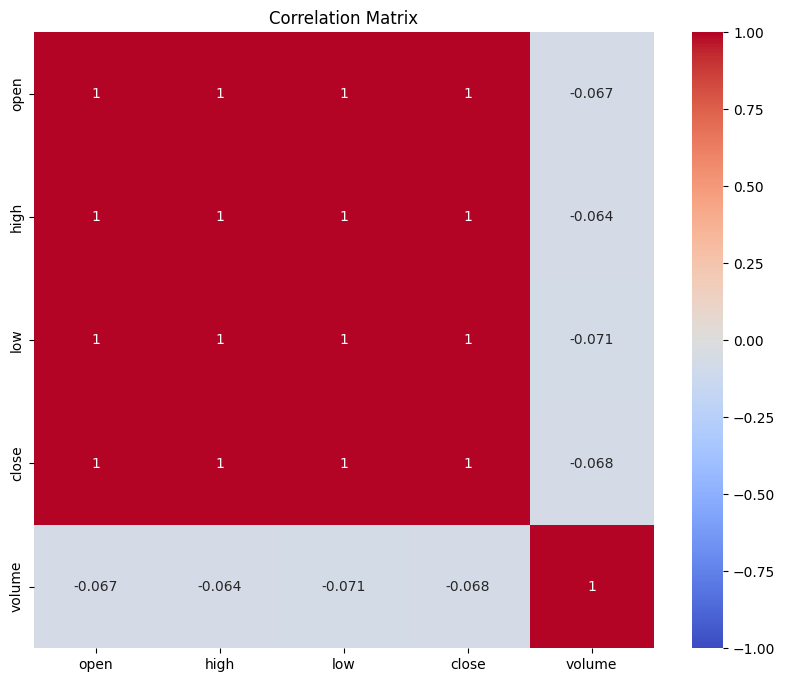

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'
# df = pd.read_csv('your_data.csv')  # or however you load your data

# Calculate the correlation matrix
correlation_matrix = df[['open', 'high', 'low', 'close', 'volume']].corr()

print(correlation_matrix)
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

In [20]:
# Ensure all numerical columns are in the correct format (float)
df['open'] = df['open'].astype(float)
df['high'] = df['high'].astype(float)
df['low'] = df['low'].astype(float)
df['close'] = df['close'].astype(float)
df['volume'] = df['volume'].astype(float)

In [21]:
# Technical indicators
df["VWAP"] = ta.vwap(df.high, df.low, df.close, df.volume)
# df['RSI'] = ta.rsi(df.close, length=16)
my_bbands = ta.bbands(df.close, length=14, std=2.0)
df = df.join(my_bbands)

test_data = df[-50:]
df = df[50:-50]

C:\Users\Pc\AppData\Local\Temp\ipykernel_13764\1722955639.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["VWAP"] = ta.vwap(df.high, df.low, df.close, df.volume)


In [22]:
df.describe()

,open,high,low,close,volume,VWAP,BBL_14_2.0,BBM_14_2.0,BBU_14_2.0,BBB_14_2.0,BBP_14_2.0
count,99900.000000,99900.000000,99900.000000,99900.000000,99900.000000,99900.000000,99900.000000,99900.000000,99900.000000,99900.000000,99900.000000
mean,64948.120319,64971.214787,64925.197969,64948.206608,6.976013,64959.314727,64856.386008,64948.475481,65040.564955,0.286462,0.500513
std,4190.391943,4187.977233,4192.564248,4190.365206,12.867605,4192.357172,4198.306668,4190.215320,4183.407614,0.234519,0.322885
min,53785.930000,53936.470000,53499.900000,53785.920000,0.002111,54904.263348,53553.935327,53981.087857,54095.719610,0.009319,-0.395720
25%,61622.970000,61644.210000,61601.675000,61622.432500,1.401064,61668.088116,61537.318296,61618.422143,61727.680897,0.141397,0.234867
50%,66136.085000,66149.515000,66121.860000,66136.300000,3.278541,66157.578037,66080.591235,66137.302857,66194.787635,0.223068,0.499047
75%,68151.957500,68178.522500,68126.392500,68151.842500,7.646228,68185.701636,68053.366234,68148.606429,68262.580333,0.355619,0.768623
max,71924.930000,71974.040000,71900.900000,71920.020000,646.158688,71253.630090,71734.959313,71844.474286,72177.370617,4.712554,1.389829


In [23]:
from sklearn.preprocessing import MinMaxScaler
import joblib

df_numeric = df.select_dtypes(include=[np.number])

# Define a scaler for features (all columns)
feature_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = feature_scaler.fit_transform(df_numeric)

# Save both scalers to use during prediction
# joblib.dump(feature_scaler, 'feature_scaler_100K.joblib')




In [24]:
print(df_numeric)

                               open      high       low     close     volume  \
Date                                                                           
2024-05-21 07:11:00+00:00  71141.30  71141.30  71075.32  71098.06  20.930876   
2024-05-21 07:12:00+00:00  71098.06  71098.06  71027.55  71029.07   6.018064   
2024-05-21 07:13:00+00:00  71029.07  71029.08  70998.00  71016.91   7.610881   
2024-05-21 07:14:00+00:00  71016.92  71039.67  71004.79  71024.44   4.595252   
2024-05-21 07:15:00+00:00  71024.66  71055.76  71002.72  71047.70   5.123208   
...                             ...       ...       ...       ...        ...   
2024-07-29 17:13:00+00:00  67065.12  67085.92  66968.63  66988.66  18.974898   
2024-07-29 17:14:00+00:00  66988.67  67141.87  66984.62  67043.20  51.868801   
2024-07-29 17:15:00+00:00  67035.50  67096.67  67000.00  67014.55  12.321043   
2024-07-29 17:16:00+00:00  67014.45  67021.50  66938.75  67002.93  12.290579   
2024-07-29 17:17:00+00:00  67002.81  670

In [25]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Припустимо, що у вас є датасет з 7 ознак, включаючи "close"
seq_length = 50
pred_length = 5

# Створюємо функцію для підготовки послідовностей
def create_sequences(data, seq_length, pred_length):
    X, y = [], []
    for i in range(len(data) - seq_length - pred_length + 1):
        X.append(data[i:i+seq_length])  # 50 рядків для навчання
        y.append(data[i+seq_length:i+seq_length+pred_length, 3])  # Прогнозуємо "close" (індекс 3)
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, seq_length, pred_length)

# Кастомна функція втрат (MSE між двома векторами з 5 елементів)
def custom_loss(y_true, y_pred):
    mse = tf.reduce_mean(tf.square(y_true - y_pred), axis=-1)
    return mse

# Створюємо модель LSTM
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(seq_length, X.shape[2])),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(pred_length)  # Передбачаємо 5 наступних значень "close"
])

# Використовуємо кастомну функцію втрат
model.compile(optimizer='adam', loss=custom_loss)

# Навчання моделі
history = model.fit(X, y, epochs=10, batch_size=32)

# Прогнозуємо на останньому вікні і можемо перевірити на реальних даних
last_sequence = X[-1]  # Беремо останні 50 кроків
predicted_close = model.predict(last_sequence[np.newaxis, :, :])
predicted_close = scaler.inverse_transform(predicted_close)  # Масштабуємо назад

# Виводимо результати
print("Прогнозовані 5 значень 'close':", predicted_close)
print("Реальні 5 значень 'close':", df[-5:, 3])

Epoch 1/10
3121/3121 [==============================] - 54s 14ms/step - loss: 8.2686e-04
Epoch 2/10
3121/3121 [==============================] - 43s 14ms/step - loss: 3.8030e-05
Epoch 3/10
3121/3121 [==============================] - 43s 14ms/step - loss: 3.1901e-05
Epoch 4/10
3121/3121 [==============================] - 45s 14ms/step - loss: 2.6916e-05
Epoch 5/10
3121/3121 [==============================] - 41s 13ms/step - loss: 2.5511e-05
Epoch 6/10
3121/3121 [==============================] - 43s 14ms/step - loss: 2.3151e-05
Epoch 7/10
3121/3121 [==============================] - 43s 14ms/step - loss: 2.2099e-05
Epoch 8/10
3121/3121 [==============================] - 43s 14ms/step - loss: 2.1463e-05
Epoch 9/10
3121/3121 [==============================] - 47s 15ms/step - loss: 2.0616e-05
Epoch 10/10
1/1 [==============================] - 1s 830ms/step


NameError: name 'scaler' is not defined

In [21]:
print(X[-1])

[[0.77494349 0.77207517 0.77713711 0.77280262 0.00710934 0.86969115
  0.7810174  0.77838549 0.76995326 0.08073987 0.31994779]
 [0.77259386 0.76859244 0.7719825  0.76798849 0.01432631 0.86959651
  0.77887342 0.77745113 0.77026287 0.09472555 0.21808263]
 [0.76777992 0.76394437 0.75220858 0.75858135 0.28440932 0.86748707
  0.77351525 0.77614387 0.77306753 0.14118087 0.12952281]
 [0.75837588 0.75687911 0.75162002 0.7546589  0.17258013 0.86619562
  0.76833877 0.77483249 0.77568135 0.18555106 0.17280768]
 [0.75495893 0.75085835 0.7499125  0.74804484 0.22026679 0.86450878
  0.76171373 0.7725604  0.77785348 0.23576658 0.18347198]
 [0.74784167 0.74838462 0.75196131 0.75231249 0.04448496 0.86417948
  0.75826138 0.77035829 0.77697375 0.25061249 0.2832294 ]
 [0.75266663 0.75009605 0.75004076 0.7458374  0.04613328 0.86383181
  0.75377153 0.76770406 0.77624388 0.27228312 0.25544691]
 [0.74561552 0.74257952 0.74384218 0.74072659 0.10403606 0.86300335
  0.7490503  0.76461598 0.77488946 0.29179062 0.24

In [26]:
model.save_weights("lstm_model_weights.h5")

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

# Create the prediction model
def create_prediction_model(seq_length, features):
    model = Sequential()
    model.add(LSTM(50, stateful=True, batch_input_shape=(1, seq_length, features), return_sequences=True))  # Batch size = 1 for prediction
    model.add(LSTM(50, stateful=True))
    model.add(Dense(5))  # Predicting the next 5 'close' values
    return model

# Initialize the prediction model
predict_model = create_prediction_model(seq_length, X.shape[2])

# Load the weights from the training model
predict_model.set_weights(model.get_weights())

# Prepare the last sequence for prediction
last_sequence = X[-1]  # Get the last sequence for prediction

# Reshape to match the expected input shape for the model
last_sequence = last_sequence[np.newaxis, :, :]

In [53]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

seq_length = 50  # Length of input sequences
pred_length = 5  # Number of values to predict
features = X.shape[2]

In [ ]:
import numpy as np
import joblib

# Завантаження скейлера
feature_scaler = joblib.load('feature_scaler.joblib')

# Підготовка останньої послідовності для прогнозування
last_sequence = X[-1]
last_sequence = last_sequence[np.newaxis, :, :]

# Прогнозування
predicted_close = predict_model.predict(last_sequence)
predicted_close = predicted_close.flatten()

# Створення масиву з нулями для всіх ознак, крім 'close'
num_features = df_numeric.shape[1]
temp_array = np.zeros((len(predicted_close), num_features))
temp_array[:, 3] = predicted_close  # Припускаємо, що 'close' - останній стовпець

# Зворотне перетворення
inverse_transformed = feature_scaler.inverse_transform(temp_array)

# Вилучення лише значень 'close'
predicted_close_actual = inverse_transformed[:, 3]

print("Прогнозовані 5 значень 'close' (після зворотного перетворення):", predicted_close_actual)
print("Реальні 5 значень 'close':", df['close'].values[-5:])

1/1 [==============================] - 0s 27ms/step
Прогнозовані 5 значень 'close' (після зворотного перетворення): [67101.19005824 67124.33162601 67154.50105336 67122.85514859
 67144.29433573]
Реальні 5 значень 'close': [66988.66 67043.2  67014.55 67002.93 66942.02]


In [87]:
import numpy as np
import joblib

# Завантаження скейлера
feature_scaler = joblib.load('feature_scaler.joblib')

# Підготовка останньої послідовності для прогнозування
last_50_rows = df_numeric.iloc[-50:].values
scaled_last_50_rows = feature_scaler.transform(last_50_rows)

# Перетворення у формат, очікуваний моделлю
last_sequence = scaled_last_50_rows[np.newaxis, :, :]  # Shape: (1, 50, number_of_features)

# Прогнозування
predicted_close = predict_model.predict(last_sequence)
predicted_close = predicted_close.flatten()


# Створення масиву з нулями для всіх ознак, крім 'close'
num_features = df_numeric.shape[1]
temp_array = np.zeros((len(predicted_close), num_features))
temp_array[:, 3] = predicted_close  # Припускаємо, що 'close' - останній стовпець

# Зворотне перетворення
inverse_transformed = feature_scaler.inverse_transform(temp_array)

# Вилучення лише значень 'close'
predicted_close_actual = inverse_transformed[:, 3]

print("Прогнозовані 5 значень 'close' (після зворотного перетворення):", predicted_close_actual)
print("Реальні 5 значень 'close':", df['close'].values[-5:])

1/1 [==============================] - 0s 35ms/step
Прогнозовані 5 значень 'close' (після зворотного перетворення): [66988.64594519 67007.96229071 67045.19416568 67015.62354397
 67036.5136458 ]
Реальні 5 значень 'close': [66988.66 67043.2  67014.55 67002.93 66942.02]


c:\Users\Pc\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
